<a href="https://colab.research.google.com/github/FrancescoCortopassi/copilot-codespaces-vscode/blob/main/Lezione_41__to_4_i6pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
#BETA RATIO: La statistica che indica la relazione tra la variazione il PORTAFOGLIO (strategie, trading assets, altro) ed un BENCHMARK che rappresenta un'indice (ad esempio l'SP500)
#questo calcolo serve per comprendere quanto la variazione del portafloglio che gestiamo si discosti (positivamente/negativamente) dalla variazione di un indice di riferimento

#ABSOLUTE VALUE:<1 BUONO: Il portafoglio ha una variazione INFERIORE a quello dell'indice di riferimento

#ABSOLUTE VALUE:>1 NEGATIVO: Il portafoglio ha una variazione MAGGIORE a quello dell'indice di riferimento

#Importare i dati per calcolare la covarianza tra il PORTAFOGLIO e l'INDICE
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sp500= yf.download ("^GSPC")["Volume"].pct_change(1)
sp500.name="SP500"
print(sp500.columns)



[*********************100%***********************]  1 of 1 completed

Index(['^GSPC'], dtype='object', name='Ticker')


In [89]:
df= yf.download ("GOOG", end= "2023-01-01")
print (df)

return_serie= df["Volume"].pct_change(1).dropna()
return_serie.name="return"
print (return_serie)


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           GOOG       GOOG       GOOG       GOOG       GOOG
Date                                                             
2004-08-19   2.490186   2.582506   2.381485   2.481747  897427216
2004-08-20   2.687981   2.707090   2.494156   2.506813  458857488
2004-08-23   2.715032   2.816287   2.706346   2.748535  366857939
2004-08-24   2.602609   2.769630   2.570346   2.760696  306396159
2004-08-25   2.630652   2.680287   2.578039   2.604841  184645512
...               ...        ...        ...        ...        ...
2022-12-23  89.488457  89.777419  87.306303  87.306303   17815000
2022-12-27  87.615196  89.179575  87.221614  88.990253   15470900
2022-12-28  86.150452  88.203074  86.060778  87.186729   17879600
2022-12-29  88.631538  89.045054  86.678556  86.718414   18280700
2022-12-30  88.412331  88.511971  86.718412  87.052212   19190300

[4625 rows x 5 columns]
Ticker          GOOG
Date                
2004-08-2

In [90]:
#Adesso concateniamo i dati per avere la covarianza
val= pd.concat((return_serie, sp500) ,axis=1).dropna()#abbiamo usato il metodo CONCAT a cui abbiamo dato come valori((i due asset che vogliamo concatenare)l'axis)
val

Ticker,GOOG,^GSPC
Date,,
2004-08-20,-0.488697,-0.039619
2004-08-23,-0.200497,-0.148346
2004-08-24,-0.164810,0.069087
2004-08-25,-0.397363,0.091259
2004-08-26,-0.227859,-0.141419
...,...,...
2022-12-23,-0.246917,-0.287512
2022-12-27,-0.131580,0.074849
2022-12-28,0.155692,0.017563


ATTENZIONE: Spesso l'output che genero è differente da quello del corso perché
io devo ricreare l'ambiente di lavoro per ogni Capitolo del corso, ed alcune volte faccio ancora un pò di confusione

In [91]:
#Adesso calcoliamo il BETA
cov_var_mat= np.cov(val.values, rowvar=False)#prima creiamo la variabile per effettuare il calcolo di covarianza dell' oggetto VAL (.VALUES riguarda tutti i valori all'intero di VAL(suppongo))

cov= cov_var_mat[0][1]


print(cov_var_mat)

[[0.4768888  0.03564813]
 [0.03564813 0.04219707]]


In [92]:
#Il valore di output che ci interessa è il secondo valore in basso a sinistra (speculare al primo in alto a destra, dato che le matrici di varianza e covarianza sono simmetriche)
#che è la COVARIANZA

In [93]:
#Adesso andiamo a mostrare solo il BETA, che si calcola dividendo la COVARIANZA con la VARIANZA. [FORMULA DI BETA]
cov= cov_var_mat[0][1]
var= cov_var_mat[1][1]

beta= cov/var
print(beta)


0.8448011141326834


#NOTA BENE: Ho corretto il problema di OUTPUT che ho segnalato prima, e questo era dovuto al fatto che non avevo utilizzato la stessa colonna di dati ("Volume") per la covarianza. Penso di avere compreso meglio come richiamare con pandas una particolare colonna di dati, ma prima devo verificare (come fatto sopra) come sono indicizzate le colonne (print.(name.columns))

In [94]:
#Adesso che ho ottenuto il dato di COVARIANZA ([0.03564813) posso utilizzarlo per manipolarlo secondo le mie necessità (es: calcolare la radice quadrata)
sqrt_cov= np.sqrt(cov_var_mat[1][1])
print(sqrt_cov)

0.20541924466869713


LEZIONE 42: ALPHA RATIO

In [95]:
#LEZIONE 42: ALPHA RATIO: rappresenta la misura della performance di un portafoglio rispetto al valore atteso di una strategia,
#calcolato in funzione del rischio assunto(BETA)

#ALPHA VALUE:>0 BUONO: Il portafoglio ha una PERFORMANCE MIGLIORE (overperformance) a quella del valore atteso (in termini di risk_return)

#ABSOLUTE VALUE:<0 NEGATIVO: Il portafoglio ha una PERFORMANCE PEGGIORE(outperformance) a quella del valore atteso (in termini di risk_return)


In [96]:
#Recuperare la mean (per il mio portafoglio (return_serie))
mean= np.mean(return_serie)
mean


0.0746715230555773

In [97]:
#Calcoliamo l'ALPHA di GOOGLE
alpha= 252 * mean *(1-beta)
alpha

2.920412170428792

LEZIONE 43: DROWDAWN FUNCTION

In [98]:
#DROWDAWN:Il drowdoawn definisce la misura del rischio di una strategia. Il MAXIMUM DROWDAWN è una metrica molto interessante perché misura la perdita massima
#(in un dato periodo di tempo) di una strategia.Questo ci permette di comprendere quanto la strategia sia RISCHIOSA (in accordo con il nostro livello di rischio)

#Creaiamo la funzione
def drowdawn_function (serie):

  #adesso calcoliamo la somma dei dati nella serie +1
  cum=serie.dropna().cumsum() +1

  #Come si nota dall'esempio l'output della funzione (accumulate_max) ci consegna un'altra lista in cui l'ultimo numero rappresenta sempre il massimo,
#fino a che la serie non troverà un  numero maggiore (in questo caso >5)

#Importiamo NUMPY per il calcolo del drowdawn massimo
  import numpy as np
  running_max=np.maximum.accumulate (cum) #utiliziamo il modulo MAXIMUM_ACCUMULATE

  #Calcoliamo il drowdawn con questa formula: DROWDAWN/MAX DORWDAWN -1
  drowdawn= cum/running_max-1
  return drowdawn

  #calcoliamo il drowdawn
  drowdawn= drowdawn_function(return_serie)#Utilizziamo la DROWDAWN_FUNCTION ()
  drowdawn()
  plt.figure(figsize=(15,8))
  plt.title("Drowdawn")
  plt.ylabel=("drowdawn %")
  plt.fill_between (drowdawn.index, drowdawn*100, 0,
                  drowdawn, color= "#CE5757", alpha=0.65)
  plt.show()




IMPORTANTE: Controllare sempre l'indentazione del codice (soprattutto quando c'è Errorname), è davvero importante per mantenere il codice all'interno delle funzioni, delle classi o comunque degli oggetti che creiamo, altrimenti potrebbero non essere riconosciuto

In [99]:
#Plottare la misura del grafico
plt.figure(figsize=(15,8))

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

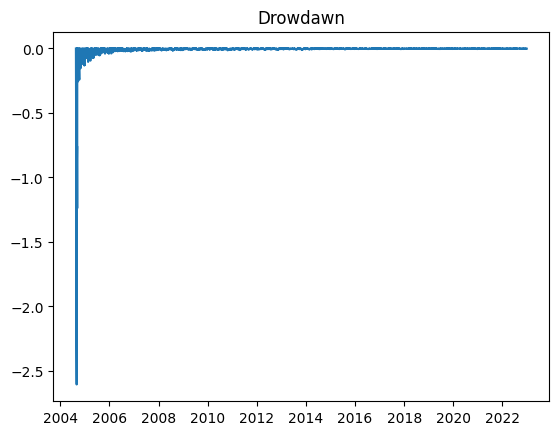

In [100]:
#TEST: Sto ricevendo un'errore di output quando vado a plottare il dorwdawn, quindi ho provato un test semplice
#utilizzando il PLOT e vedendo cosa succedeva
plt.plot(drowdawn)

#Cambiare titolo
plt.title("Drowdawn")
plt.ylabel=("drowdawn %")

LEZIONI DA COMPLETARE:45-46